In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
single_img = x_train[0]

In [7]:
single_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

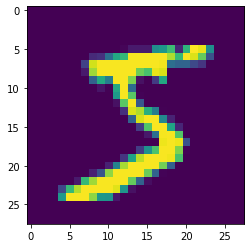

In [8]:
plt.imshow(single_img)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(60000,)

In [12]:
y_example = to_categorical(y_train)

In [13]:
y_example.shape

(60000, 10)

In [15]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [17]:
y_cat_train = to_categorical(y_train,10)

In [18]:
x_train = x_train/255
x_test = x_test/255

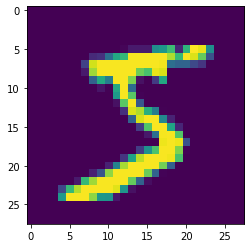

In [19]:
plt.imshow(x_train[0])

In [20]:
x_train.shape

(60000, 28, 28)

In [22]:
x_train = x_train.reshape(60000,28,28,1)

In [24]:
x_test = x_test.reshape(10000,28,28,1)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [26]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation="softmax"))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode='auto', patience=25, verbose=1)

In [30]:
model.fit(x_train,y_cat_train,callbacks=[early_stop],epochs=20,validation_data=(x_test,y_cat_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 220us/sample - loss: 0.1437 - accuracy: 0.9571 - val_loss: 0.0550 - val_accuracy: 0.9817
Epoch 2/20
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0477 - accuracy: 0.9851 - val_loss: 0.0402 - val_accuracy: 0.9875
Epoch 3/20
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0332 - accuracy: 0.9894 - val_loss: 0.0365 - val_accuracy: 0.9881
Epoch 4/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.0364 - val_accuracy: 0.9879
Epoch 5/20
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.0479 - val_accuracy: 0.9857
Epoch 6/20
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0120 - accuracy: 0.9959 - val_loss: 0.0383 - val_accuracy: 0.9895
Epoch 7/20
60000/60000 [=========================

In [31]:
losses = pd.DataFrame(model.history.history)

In [33]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.143718,0.957100,0.055048,0.9817
1,0.047653,0.985067,0.040154,0.9875
2,0.033247,0.989400,0.036503,0.9881
3,0.021615,0.993133,0.036355,0.9879
4,0.015110,0.995400,0.047942,0.9857
5,0.012018,0.995950,0.038345,0.9895
6,0.007875,0.997317,0.053767,0.9860
7,0.007928,0.997117,0.051296,0.9866
8,0.003961,0.998767,0.055866,0.9874
9,0.006629,0.997750,0.044754,0.9883


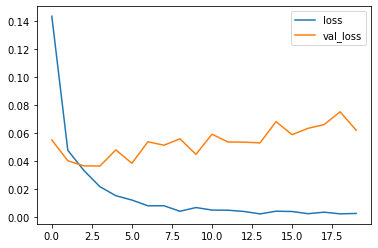

In [37]:
losses[['loss','val_loss']].plot()

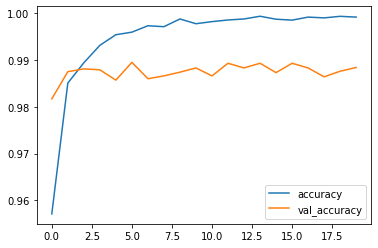

In [39]:
losses[['accuracy','val_accuracy']].plot()

In [40]:
model.metrics_names

['loss', 'accuracy']

In [41]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 87us/sample - loss: 0.0620 - accuracy: 0.9884


[0.06200906189108974, 0.9884]

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
prediction = model.predict_classes(x_test)

In [44]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [45]:
y_cat_test.shape

(10000, 10)

In [46]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [47]:
print(classification_report(y_test,prediction))

precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [48]:
confusion_matrix(y_test,prediction)

array([[ 973,    1,    1,    1,    0,    1,    1,    0,    1,    1],
       [   1, 1124,    1,    3,    1,    1,    2,    1,    1,    0],
       [   1,    2, 1022,    1,    0,    0,    0,    5,    1,    0],
       [   0,    0,    2, 1002,    0,    3,    0,    1,    2,    0],
       [   0,    0,    0,    0,  973,    0,    5,    0,    0,    4],
       [   1,    1,    0,   10,    0,  877,    2,    1,    0,    0],
       [   3,    2,    0,    0,    3,    2,  947,    0,    1,    0],
       [   0,    0,    6,    1,    0,    1,    0, 1018,    1,    1],
       [   3,    1,    2,    1,    1,    0,    0,    1,  962,    3],
       [   1,    0,    0,    5,   11,    4,    0,    2,    0,  986]],
      dtype=int64)

In [49]:
import seaborn as sns

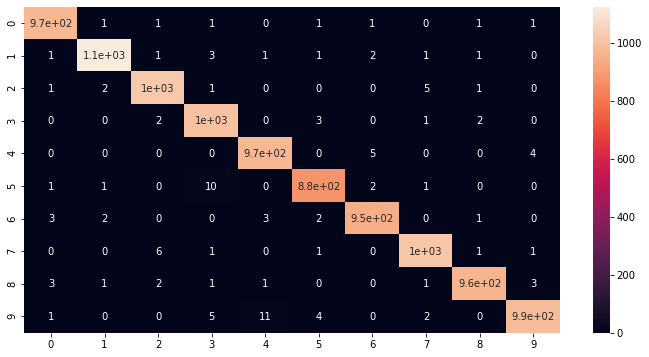

In [52]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)

In [54]:
my_number = x_test[0]
my_number.shape

(28, 28, 1)

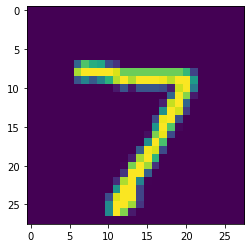

In [55]:
plt.imshow(my_number.reshape(28,28))

In [59]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)